### 1. Simulate tossing a biased coin (a Bernoulli trial) where P[HEAD] = 0.7

##### a) Count the number of heads in 50 trials. Record the longest run of heads.

In [2]:
# Import library
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

# Define variables
prob_head = 0.7   # Probability of head: 0.7
prob_tail = 0.3   # Probability of tail: 0.3
toss = 50   # Number of coin toss

# Define a function for recording the longest run of heads

def bias_coin_toss_head_runs(prob_head, prob_tail, toss):
    cnt_head = 0   # Head count
    longest_run = 0   # Longest run record

    for N in range(toss):
        if random.choices(["Heads", "Tails"], [prob_head, prob_tail]) == ["Heads"]:   # Bernoulli coin toss
            cnt_head += 1   # Count the number of consecutive heads
            longest_run = max(longest_run, cnt_head)   # Compare with the previously recorded consecutive number of heads and select the larger value
        else:
            cnt_head = 0   # If tail appears reset the number count of heads

    return longest_run

longest_run = bias_coin_toss_head_runs(prob_head, prob_tail, toss)
print("The longest run =", longest_run)

The longest run = 8


##### b) Repeat the 50-flip experiment 20, 100, 200, and 1000 times. Use matplotlib to generate a histogram showing the observed number of heads for each case. Comment on the limit of the histogram.

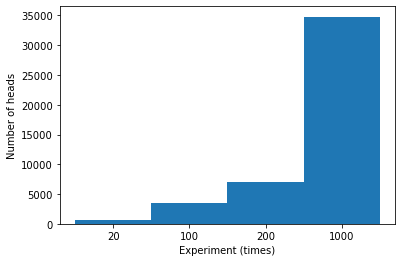

In [2]:
# Define variables
experiment = [20, 100, 200, 1000]   # Number of experiments
num_head = []   # Number of heads

# Define a function for recording the head counts

def bias_coin_toss_head_count(prob_head, prob_tail, toss, experiment):

    for N in range(len(experiment)):
        cnt_head = 0   # Initial number of heads

        for exp in range(experiment[N]):
            for t in range(toss):
                if random.choices(["Heads", "Tails"], [prob_head, prob_tail]) == ["Heads"]:   # Bernoulli coin toss
                    cnt_head += 1   # Count the number of heads
                
        num_head.append(cnt_head)   # Save the number of heads for each case
    return num_head

num_head = bias_coin_toss_head_count(prob_head, prob_tail, toss, experiment)

plt.bar(["20","100","200","1000"], num_head, align='center', alpha=1, width = 1)   # Histogram plot

plt.xlabel("Experiment (times)")   # X label
plt.ylabel("Number of heads")   # Y label
plt.show()

##### c) Simulate tossing the coin 500 times. Generate a histogram showing the heads run length.

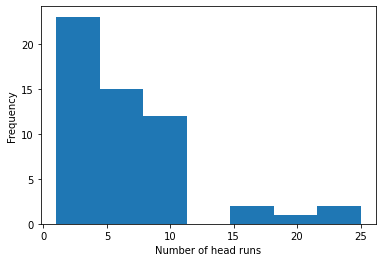

In [3]:
# Define a variable
head_run = []   # Heads run length
toss = 500   # Number of coin toss

# Define a function for recording the head counts

def bias_coin_toss_head(prob_head, prob_tail, toss):
    cnt_head = 0   # Head count
    cnt_tail = 0   # Tail count

    for N in range(toss):
        if random.choices(["Heads", "Tails"], [prob_head, prob_tail]) == ["Heads"]:   # Bernoulli coin toss
            cnt_tail = 0
            cnt_head += 1   # Count the number of consecutive heads
        else:
            cnt_tail += 1   # Count the number of consecutive tails
            
            if cnt_tail == 1 & cnt_head != 0:   # Save heads run length when the tail is observed
                head_run.append(cnt_head)   # save head runs 
                cnt_head = 0   # If tail appears reset the number count of heads

    return head_run

head_run = bias_coin_toss_head(prob_head, prob_tail, toss)

# Histogram plot

plt.hist(head_run,bins='auto')
plt.xlabel("Number of head runs")
plt.ylabel("Frequency")
plt.show()

### 2. Define the random variable as the smallest number of standard uniform random samples whose sum exceeds four. Generate a histogram using 100, 1000, and 10000 realizations of N.

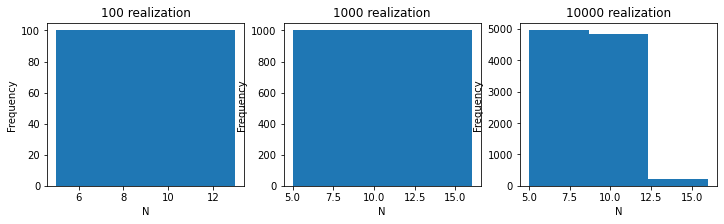

Average N = 8.71 (100 reps)
Average N = 8.772 (1000 reps)
Average N = 8.772 (10000 reps)


In [6]:
# Define variables
N100 = []
N1000 = []
N10000 = []

# Define a function for the simulation

def uniform_random_variable(num_real):
    N = []   # Number of iteration

    for i in range(num_real):
        cnt_variable = 0   # Inital N value
        sum_variable = 0   # Inital sum of x values

        while sum_variable < 4:
            sum_variable += random.uniform(0,1)   # Sum of uniform random variables
            cnt_variable += 1   # Count the iteration number (N)
        
        N.append(cnt_variable)
    
    return N

N100 = uniform_random_variable(100)   # N for 100 realization
N1000 = uniform_random_variable(1000)  # N for 1000 realization
N10000 = uniform_random_variable(10000)   # N for 10000 realization

# Histogram plot

fig = plt.figure(figsize = (12,3))

x = fig.add_subplot(131)   # subplot
x.hist(N100, bins='auto')
plt.xlabel("N")
plt.ylabel("Frequency")
plt.title("100 realization")

x = fig.add_subplot(132)   # subplot
x.hist(N1000, bins='auto')
plt.xlabel("N")
plt.ylabel("Frequency")
plt.title("1000 realization")

x = fig.add_subplot(133)   # subplot
x.hist(N10000, bins='auto')
plt.xlabel("N")
plt.ylabel("Frequency")
plt.title("10000 realization")
plt.show()

print("Average N =", stat.mean(N100),"(100 reps)")
print("Average N =", stat.mean(N1000),"(1000 reps)")
print("Average N =", stat.mean(N1000),"(10000 reps)")

As we run more rounds, the expected value of N converges and the sample distribution becomes similar to normal distribution.